In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from analysis import download_database
download_database()

Connection successfully established ... 
File successfully downloaded ...


In [56]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


19 A1
19 A2
19 B1
19 B2
19 C1
19 C2
19 D1
19 D2
19 E1
19 E2
19 F1
19 F2
19 G1
19 G2
19 H1
19 H2


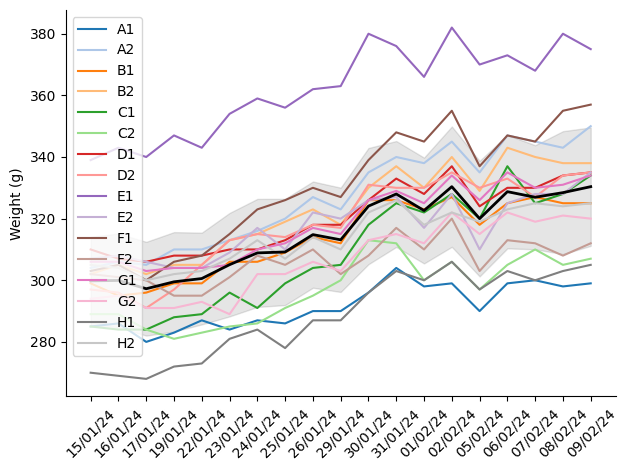

In [57]:
from plotting import *
display_weights(group_experiments, output='weights.png')

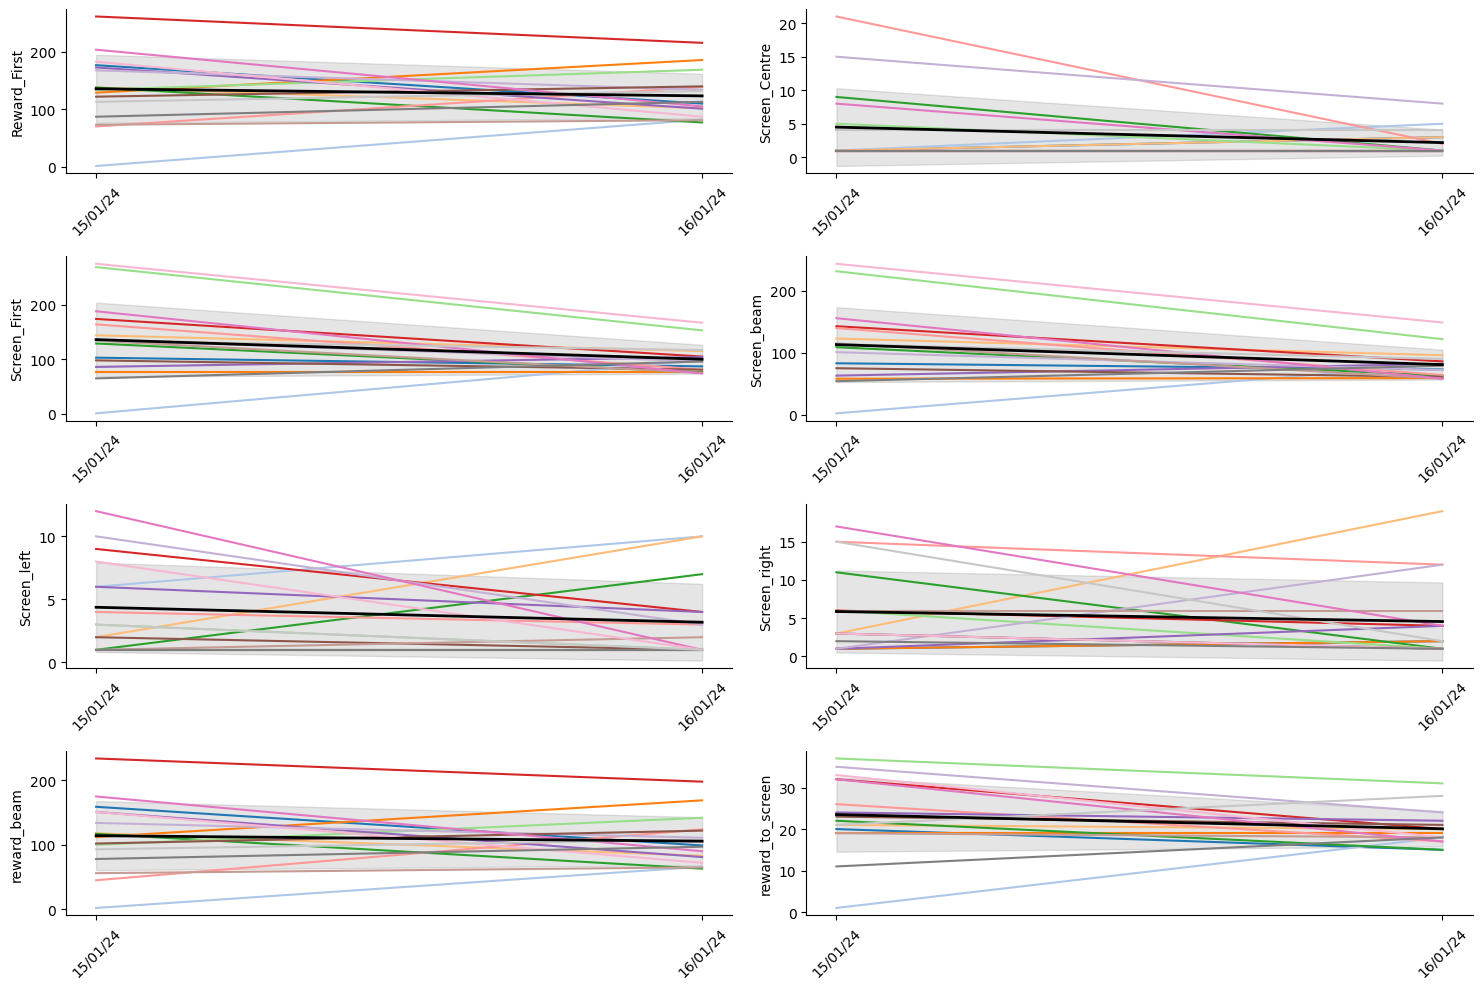

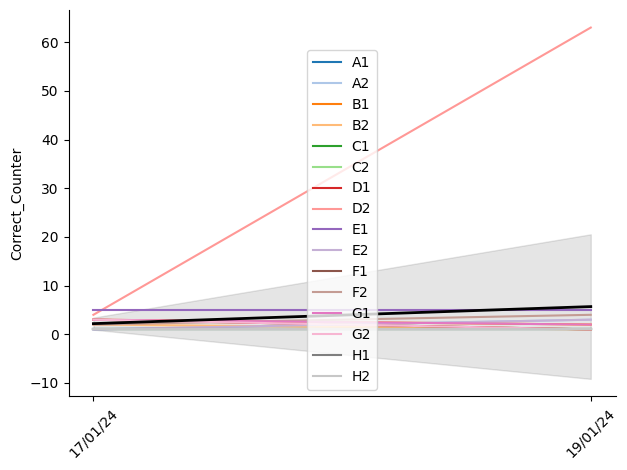

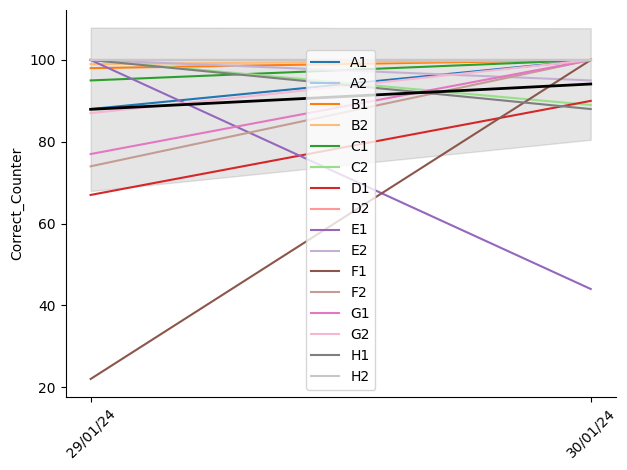

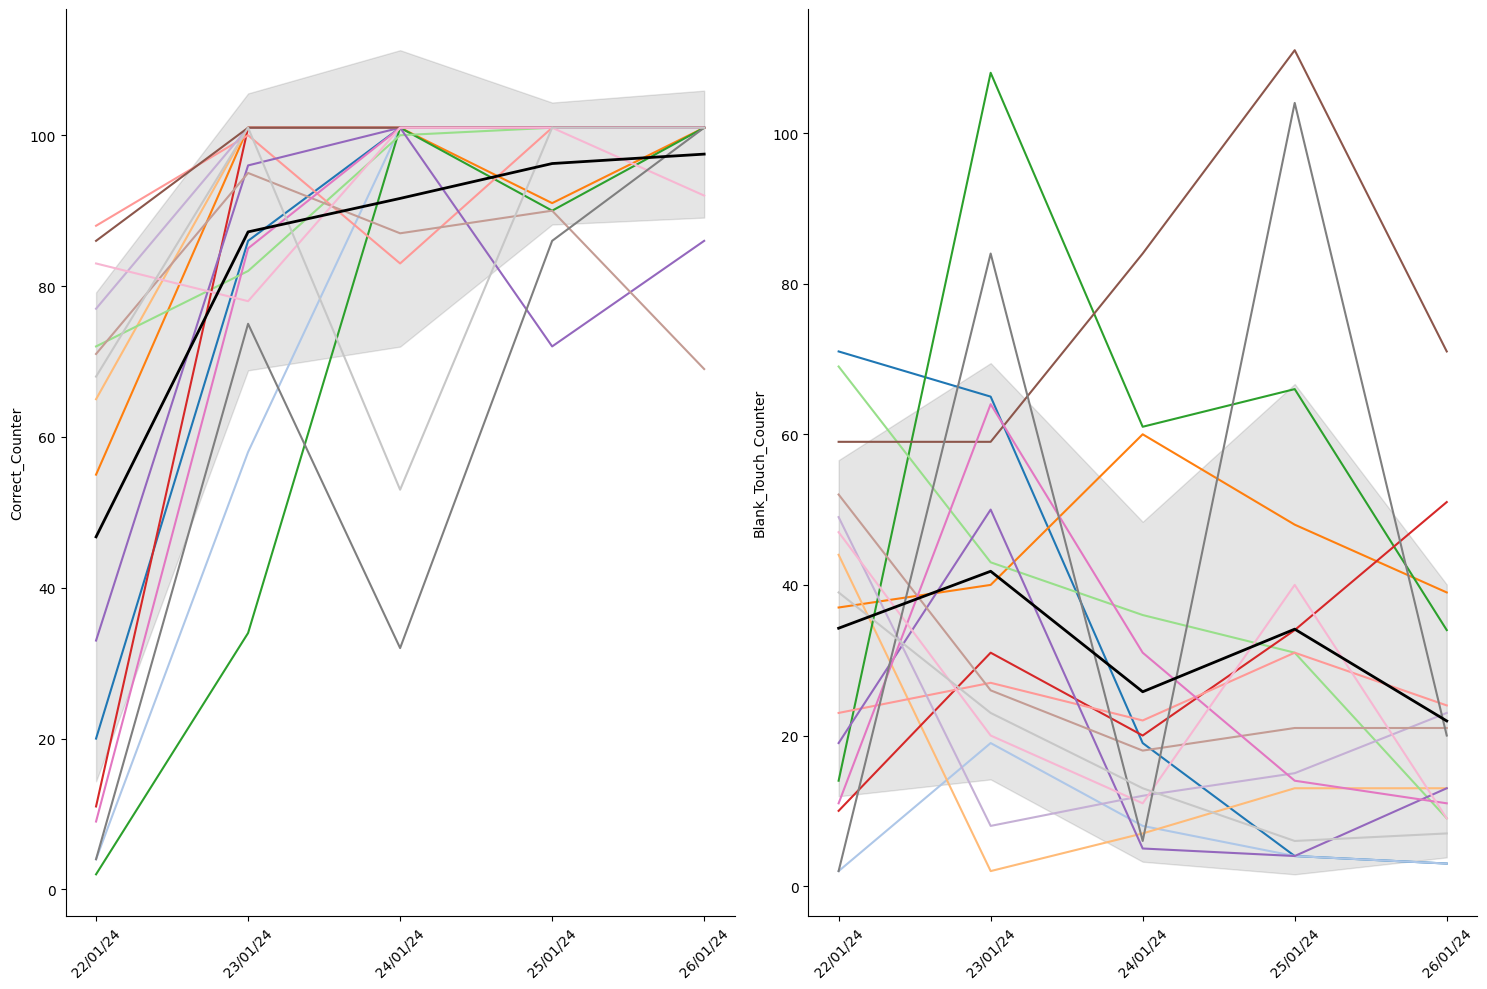

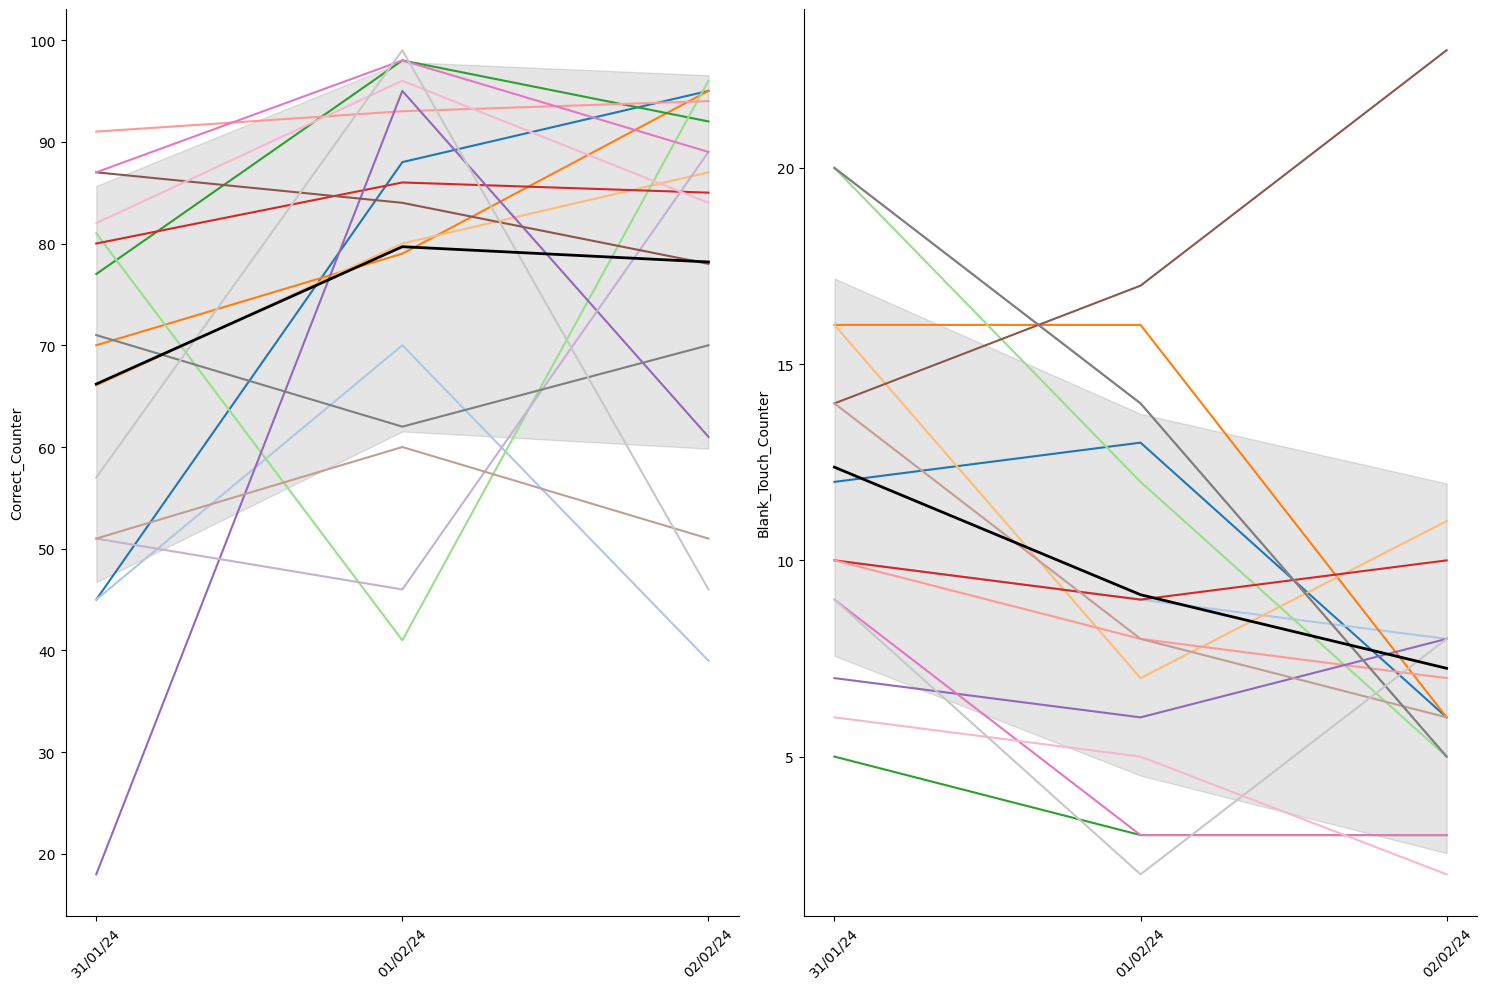

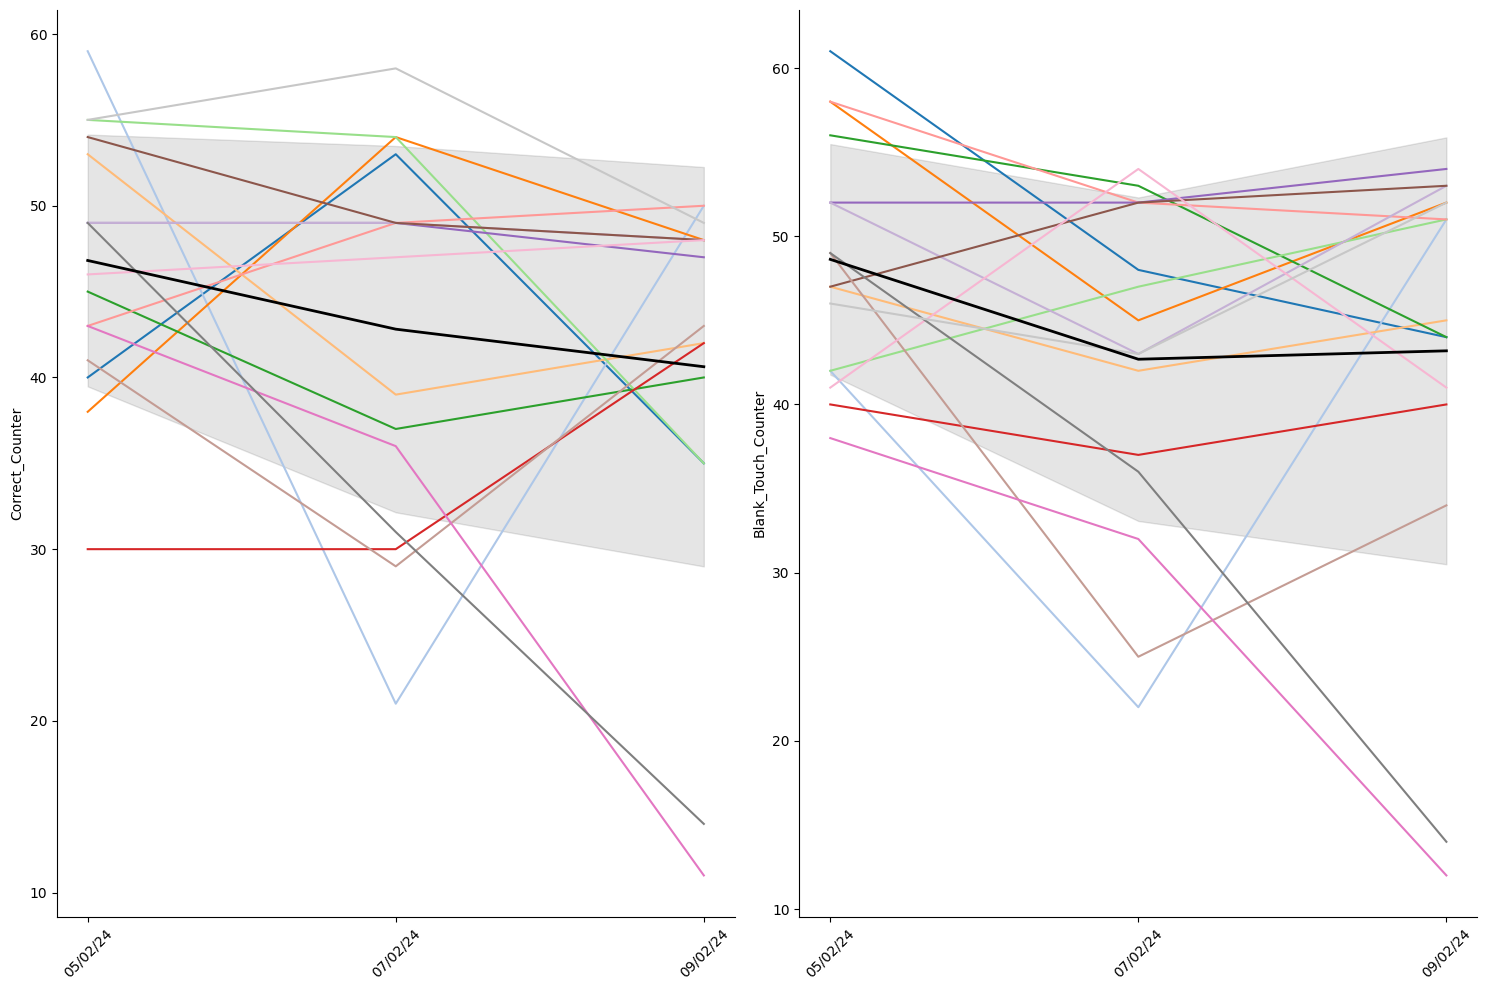

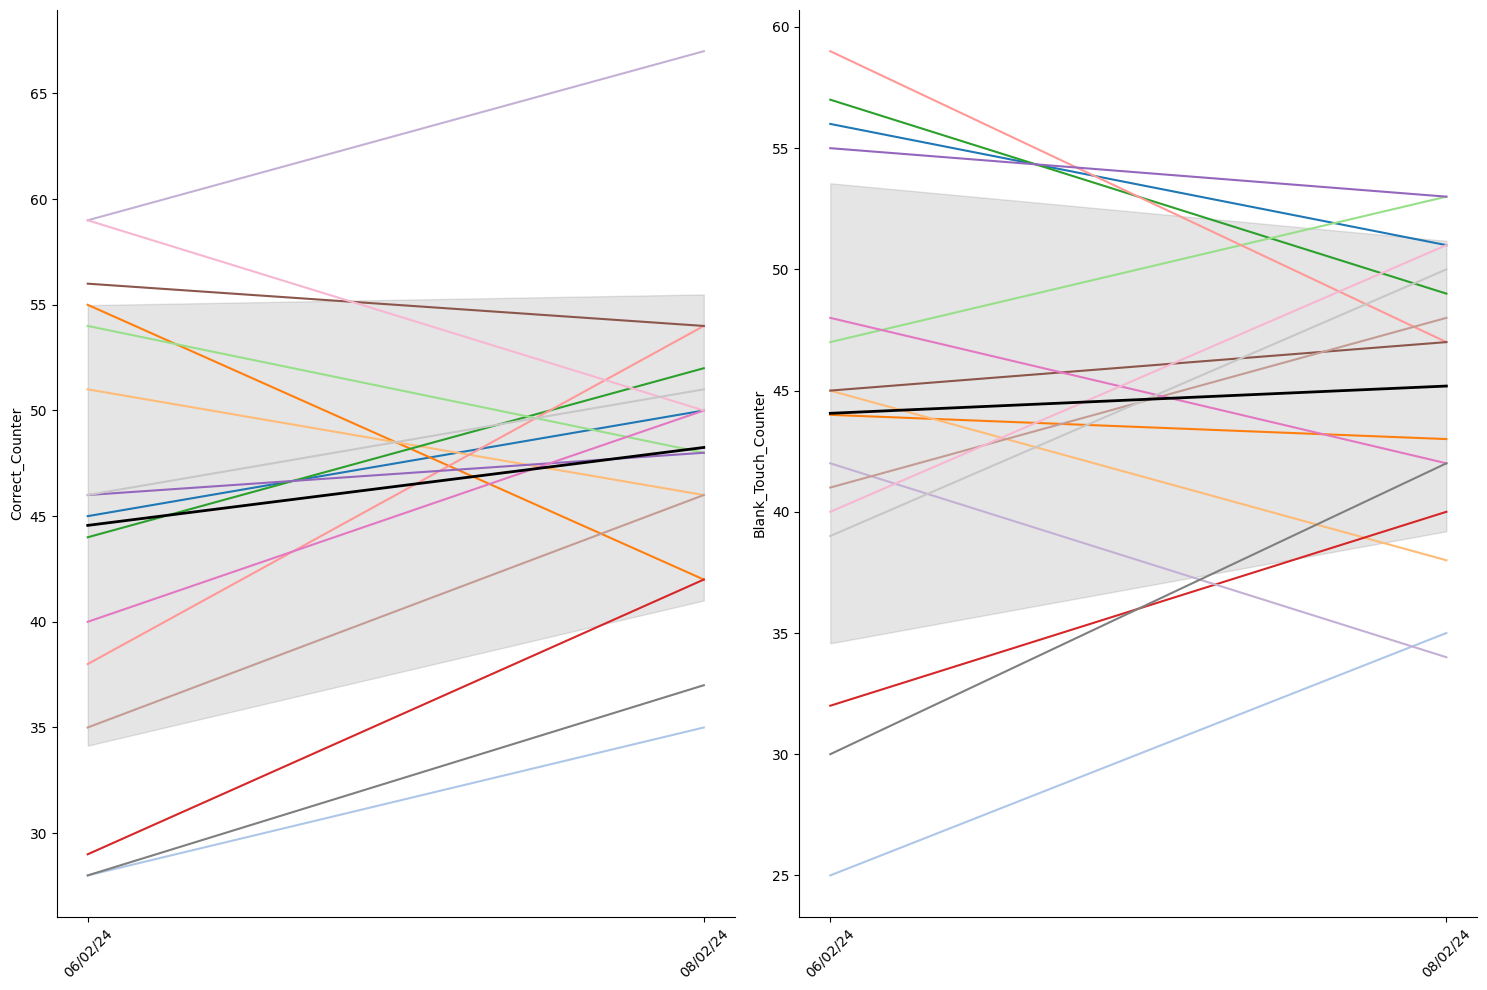

In [58]:
from plotting import *
for type in group_experiments.all_types:
    a = group_experiments.get_experiments_per_types(type)
    display_variables(a, output=f'{type}.png')

R-squared: 0.051285


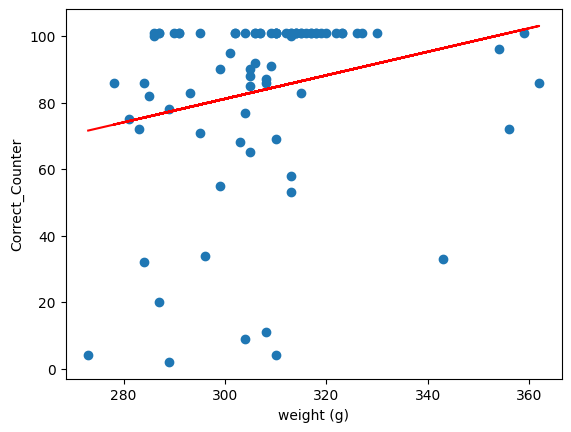

In [59]:
# Get initial weights

for type in ['Must Touch']:
    a = group_experiments.get_experiments_per_types(type)
    all_weights = []
    all_perfs = []
    for e in a.experiments:
        all_weights += [e.weight]
        all_perfs += [e.stats['Correct_Counter']]
all_weights = np.array(all_weights)
all_perfs = np.array(all_perfs)
#plt.plot(all_weights, all_perfs, '.')

plt.xlabel('weight (g)')
plt.ylabel('Correct_Counter')
from scipy import stats
res = stats.linregress(all_weights, all_perfs)
plt.plot(all_weights, all_perfs, 'o', label='original data')
plt.plot(all_weights, res.intercept + res.slope*all_weights, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

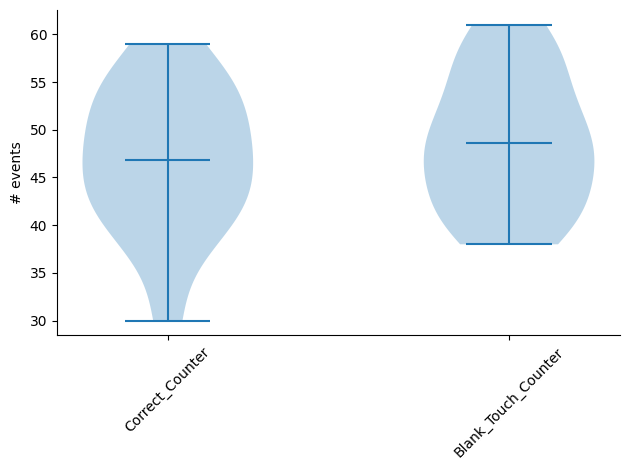

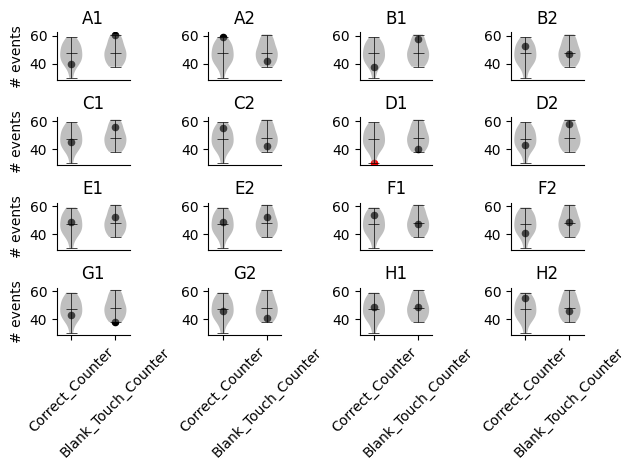

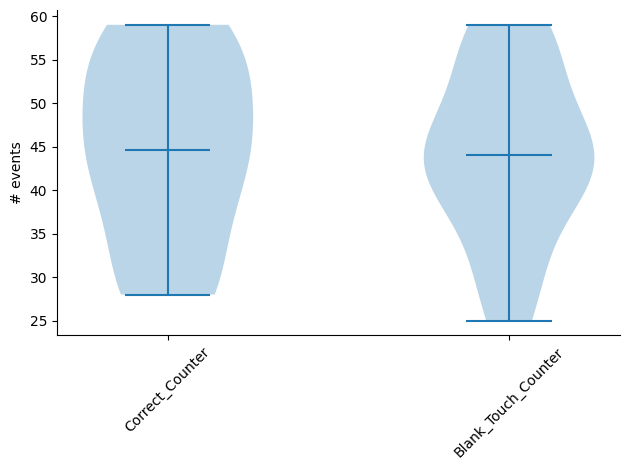

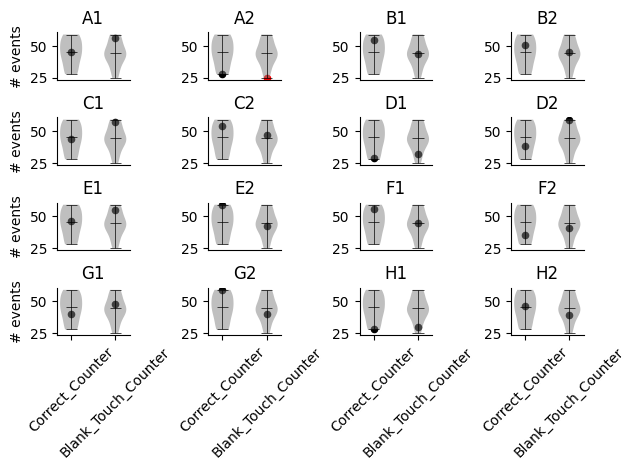

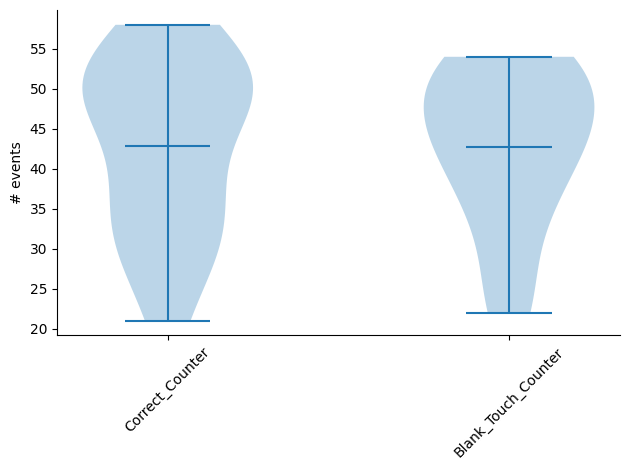

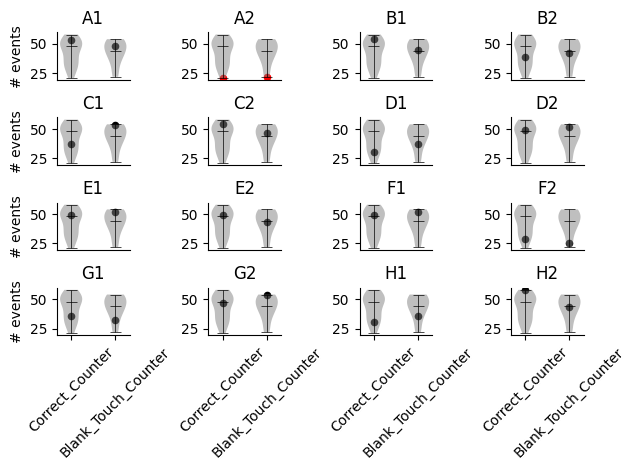

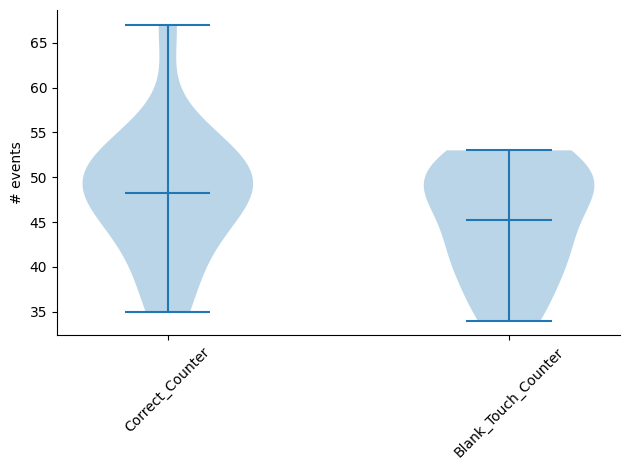

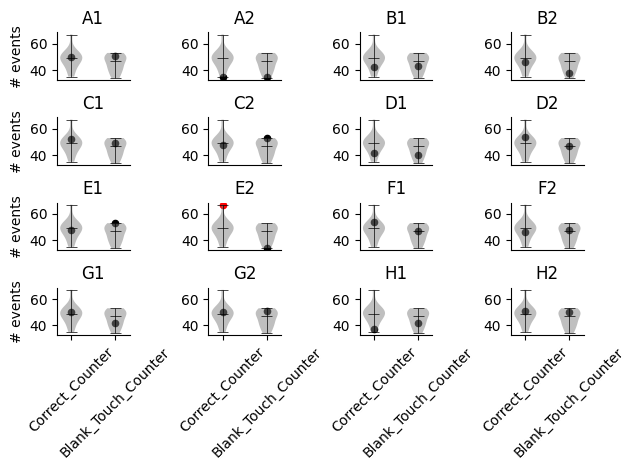

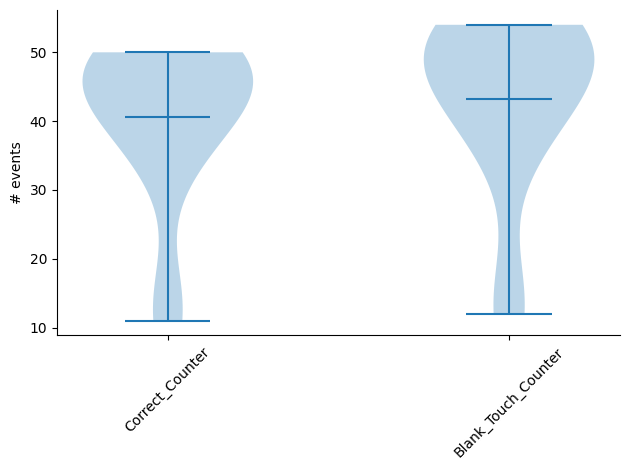

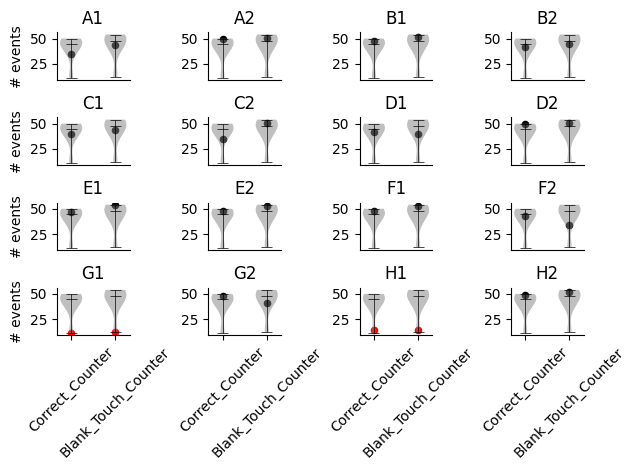

In [60]:
for date in ['05/02/24', '06/02/24', '07/02/24', '08/02/24', '09/02/24']:
    a = group_experiments.get_experiments_per_dates(date)
    mydate = date.replace('/', '')
    display_stats_group_experiments(a, output=f'stats_{mydate}.png')
    display_group_experiments(a, output=f'individuals_{mydate}.png')

In [ ]:
# Get initial weights
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    all_reaction_times = []
    all_perfs = []
    for e in a.experiments:
        all_reaction_times += [e.get_reaction_times().mean()]
        all_perfs += [e.stats['Correct_Counter']/(e.stats['Correct_Counter'] + e.stats['Blank_Touch_Counter'])]
all_reaction_times = np.array(all_reaction_times)
all_perfs = np.array(all_perfs)

plt.xlabel('reaction time (s)')
plt.ylabel('Performances')
from scipy import stats
res = stats.linregress(all_reaction_times, all_perfs)
plt.plot(all_reaction_times, all_perfs, 'o', label='original data')
plt.plot(all_reaction_times, res.intercept + res.slope*all_reaction_times, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")